# Boston

## Loading libraries

In [50]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


## Processing data

In [28]:
boston = datasets.load_boston()
boston_df =  pd.DataFrame(boston.data, columns=boston.feature_names)

print(boston_df.head())

X = boston_df.values
y = boston.target

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


## Predicting house value from a single feature

In [29]:
X_rooms = X[:,5]

print(type(X_rooms))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


We need to reshape X & y

In [38]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

Now we plot

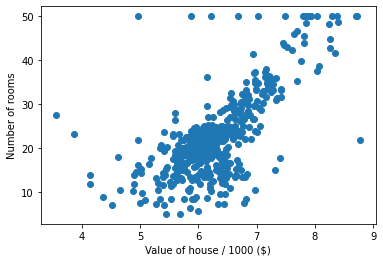

In [39]:
plt.scatter(X_rooms, y)
plt.xlabel("Value of house / 1000 ($)")
plt.ylabel("Number of rooms")
plt.show()

## Fitting a regression model

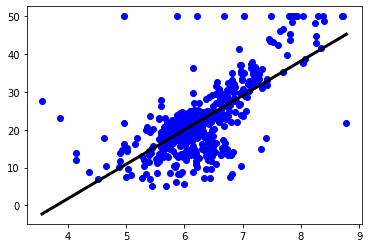

In [49]:
reg = LinearRegression()
reg.fit(X_rooms, y)
#prediction_space = np.linspace(np.min(X_rooms),
#                               np.max(X_rooms)).reshape(-1,1)
prediction_space = np.array([[np.min(X_rooms)],[np.max(X_rooms)]])

plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space,reg.predict(prediction_space), color="black", linewidth=3)
plt.show()

Now let's do it by all the features

> This is an example and Linear Regression must not be used like this, but we must use
 > regularization to add constrains to coefficients

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg.predict(X_test)
score_regression = reg_all.score(X_test,y_test)
print("Regression score: {}".format(score_regression))

Regression score: 0.7112260057484932


## $R^2$
The score for Linear Regression model uses $R^2$

## Root Mean Squared Error
This is another way to score errors and this is how it is calculated

rmse = np.sqrt(mean_squared_error(y_test, y_pred))